In [31]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

In [32]:
df = pd.read_csv(Path('..\Data\\dai-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2019-11-19 00:00:00 UTC,1.000651
1,2019-11-20 00:00:00 UTC,0.995411
2,2019-11-21 00:00:00 UTC,0.991591
3,2019-11-22 00:00:00 UTC,0.991102
4,2019-11-23 00:00:00 UTC,0.992850


In [36]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
409,2021-01-01,1.002622
410,2021-01-02,1.004035
411,2021-01-03,1.005493
412,2021-01-04,1.007851
413,2021-01-05,1.002005


In [37]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,1.004352,1.001435,1.007419
1,2021-01-02,1.003602,1.000710,1.006440
2,2021-01-03,1.004218,1.001061,1.007255
3,2021-01-04,1.003963,1.001121,1.006840
4,2021-01-05,1.004330,1.001237,1.007285


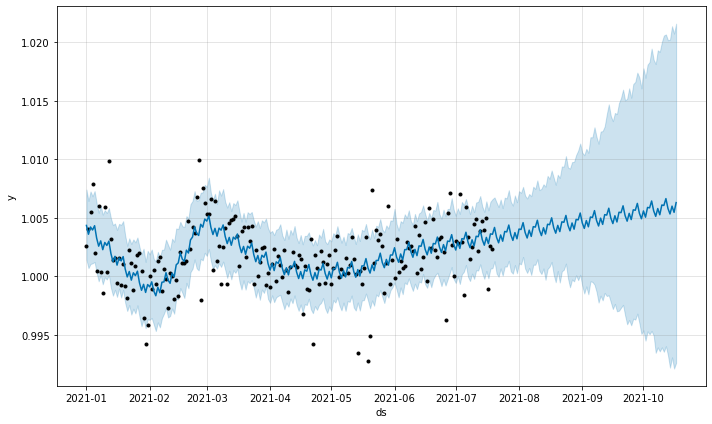

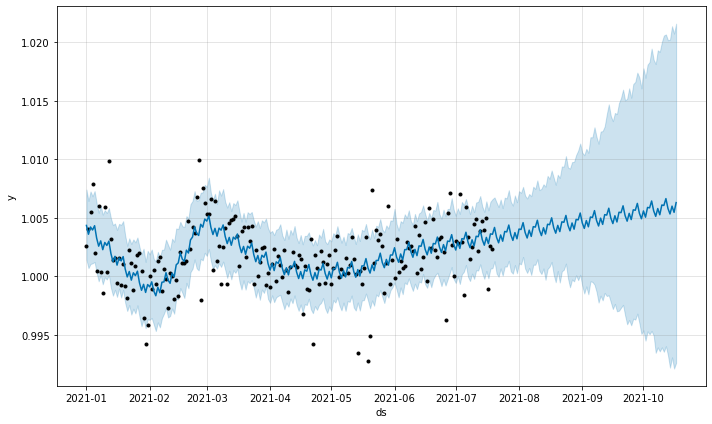

In [38]:
m.plot(forecast)

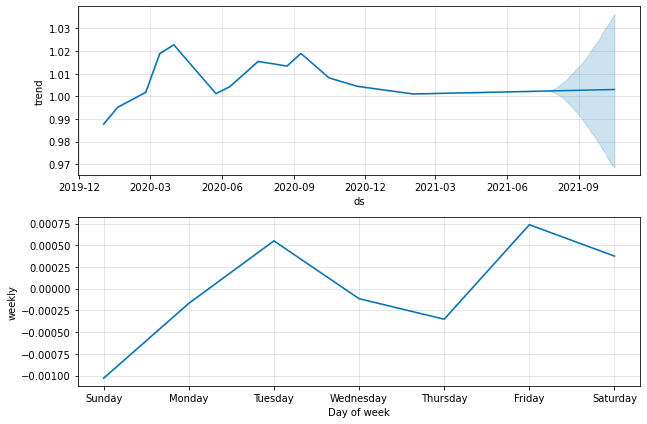

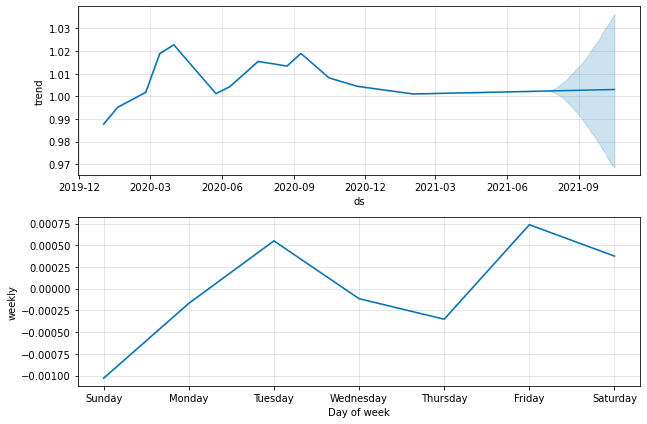

In [17]:
m.plot_components(forecast)